# Life expectancy and urban population

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

The first part is the same as the example where I explore the data. 

In [2]:
data = pd.read_csv('./Indikatorer/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


I have to find the right indicators, and I'll make a list of countries

In [17]:
# Indicators and countries
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()


This is a very long list and I prefer to look at the indicators in an excel format

In [5]:
df = pd.DataFrame(indicators)
writer = pd.ExcelWriter('indicators.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='welcome', index=False)
writer.save()

PermissionError: [Errno 13] Permission denied: 'test.xlsx'

Life expectancy at birth and Rural population seems to fit the bill. Using the setup from the course, I'll be looking into the figures for USA

In [18]:
Life=data['IndicatorName'].str.contains('Life expectancy at birth, total')
Rural=data['IndicatorCode'].str.contains('SP.RUR.TOTL.ZS')
country=data['CountryCode'].str.contains('USA')

In [19]:
stage = data[Rural & country]
stage2= data[Life & country]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22377,United States,USA,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,30.004
48858,United States,USA,Rural population (% of total population),SP.RUR.TOTL.ZS,1961,29.623
77248,United States,USA,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,29.243
105867,United States,USA,Rural population (% of total population),SP.RUR.TOTL.ZS,1963,28.866
134905,United States,USA,Rural population (% of total population),SP.RUR.TOTL.ZS,1964,28.492


In [20]:
stage.shape

(55, 6)

In [21]:
stage2.shape

(54, 6)

In [ ]:

# get the years
years = stage['Year'].values
# get the values 
countryside = stage['Value'].values

fig, axis = plt.subplots()
# create histogram of % of rural population
axis.set_title('Rural population, % of total population, USA',fontsize=12)
axis.set_xlabel('Year',fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

plt.bar(years,countryside)
plt.show()

In [ ]:
# create histogram of expected lifespan 
years = stage2['Year'].values
longlife = stage2['Value'].values

fig, axis = plt.subplots()
axis.set_title('Life expectancy at birth, USA',fontsize=12)
axis.set_xlabel('Year',fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)
plt.bar(years,longlife)
plt.show()

So looking at the histograms for USA we immediately see that the development in column-sizes are oppoite, and we should expect a negative correlation. 

I'll set up a scatterplot of life expectancy and rate of rural living

In [6]:
# first set similar timeframe. 
print("rural Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())
print("life Min Year = ", stage2['Year'].min(), "max: ", stage2['Year'].max())


NameError: name 'stage' is not defined

In [13]:
# Which means that I need to stop at 2013:
stage_trunc = stage[stage['Year'] < 2014]
print(len(stage_trunc))
print(len(stage2))

54
54


Now I'm ready to draw a scatterplot:

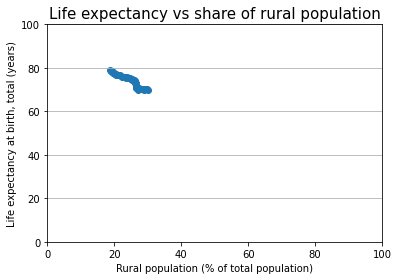

In [14]:
# %matplotlib inline
# import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Life expectancy vs share of rural population',fontsize=15)
axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)

X = stage_trunc['Value']
Y = stage2['Value']

# Adjusting Y-axis
plt.ylim(0,100)

# Adjusting x-axis
plt.xlim(0,100)

axis.scatter(X, Y)
plt.show()

I think it's easier just to use the automatically generated axises

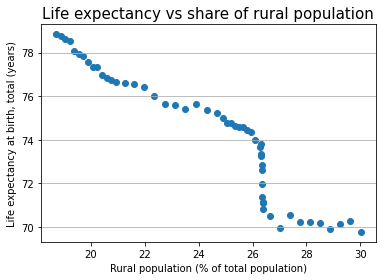

In [15]:
# %matplotlib inline
# import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Life expectancy vs share of rural population',fontsize=15)
axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)

XUSA = stage_trunc['Value']
YUSA = stage2['Value']

# Adjusting Y-axis
# plt.ylim(50,100)

# Adjusting x-axis
# plt.xlim(10,60)

axis.scatter(XUSA, YUSA)
plt.show()

In [16]:
# correlation
np.corrcoef(stage_trunc['Value'],stage2['Value'])

array([[ 1.        , -0.94501354],
       [-0.94501354,  1.        ]])

The data from USA shows a very strong negative correlation between life expectancy and share of rural population, and does not support the thesis. 
Of course, lack of correlation is not evidence. Let's try with another country. I used a random country finder from the dataset, and Mexico turned up. 

In [17]:
countryFilter = random.sample(data['CountryName'].unique().tolist(),1)
countryFilter1 = countryFilter[0]
countryFilter1

'Slovak Republic'

It's not really practical to work with randomly generated datasets based on random countries when you are making a presentation, so it's easier to fix the country. That way you can reproduce the graphs. 

In order to replace the scatterplots with the randomly generated countries, you have to replace the countryMexico variable with the variable countryRandom given by the code below:

In [18]:
countryMexico=data['CountryName']=='Mexico'

# countryRandom=data['CountryName']==countryFilter1
# countryRandom

In [19]:
# Scatterplot
country2stage = data[Rural & countryMexico]
country2stage2= data[Life & countryMexico]

# To make the graph based on the random country, replace with these lines of codes and run the following cells

# country2stage = data[Rural & countryRandom]
# country2stage2= data[Life & countryRandom]

In [20]:
# first set similar timeframe. 
print("rural Min Year = ", country2stage['Year'].min(), "max: ", country2stage['Year'].max())
print("life Min Year = ", country2stage2['Year'].min(), "max: ", country2stage2['Year'].max())


rural Min Year =  1960 max:  2014
life Min Year =  1960 max:  2013


In [21]:
# Which means that I need to stop at 2013:
country2stage = country2stage[country2stage['Year'] < 2014]
print(len(country2stage))
print(len(country2stage2))

54
54


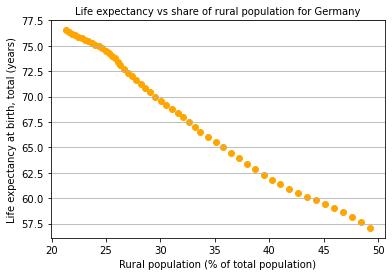

In [22]:
# Here's the scatterplot for Mexico:

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Life expectancy vs share of rural population for '+countryFilter1,fontsize=10)
axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)

X = country2stage['Value']
Y = country2stage2['Value']

# Adjusting Y-axis
# plt.ylim(0,10+max(Y))

# Adjusting x-axis
# plt.xlim(20,80)

axis.scatter(X, Y, color="orange")
plt.show()

In [23]:
# and the Correlation for Mexico:
# correlation
np.corrcoef(country2stage['Value'],country2stage2['Value'])

array([[ 1.        , -0.99511034],
       [-0.99511034,  1.        ]])

For Mexico the the data shows almost a linear negative relationship between the two indicators. I fact the correlation is almost -1, which would be linear. 

Now to plot the two figures together: 

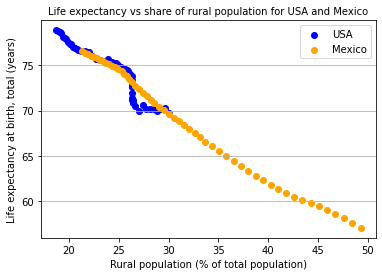

In [24]:
fig, axis = plt.subplots()

plt.scatter(XUSA,YUSA, color='blue', label='USA')
plt.scatter(X, Y, color="orange" ,label='Mexico')
plt.legend(loc='upper right')

axis.yaxis.grid(True)
axis.set_title('Life expectancy vs share of rural population for USA and Mexico',fontsize=10)
axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)
plt.show()

Now I also want to test my question across countries in a given year

First I'll check for missing data, and choose only the countries that have data for both indicators in 2011

In [25]:
# select countries in 2011
indicatorRural = 'SP.RUR.TOTL.ZS'
indicatorLife='SP.DYN.LE00.IN'
year = 2011

mask1 = data['IndicatorCode']==indicatorRural 
mask2 = data['IndicatorCode']==indicatorLife
mask3 = data['Year'].isin([year])

# apply our mask to get two datasets
Rural2011 = data[mask1 & mask3]
Life2011 = data[mask2 & mask3]
Rural2011

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026679,Arab World,ARB,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,43.434923
5027171,Caribbean small states,CSS,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,58.122724
5027719,Central Europe and the Baltics,CEB,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,37.900483
5028317,East Asia & Pacific (all income levels),EAS,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,47.178432
5029090,East Asia & Pacific (developing only),EAP,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,51.195423
...,...,...,...,...,...,...
5199258,Virgin Islands (U.S.),VIR,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,5.240000
5199775,West Bank and Gaza,WBG,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,25.644000
5200511,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,67.698000
5201353,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,60.847000


In [26]:
print(len(Rural2011))
print(len(Life2011))
# print(len(RuralLife))

245
234


There's not the same number of observations so I would need to trim the observations to countries where we have observations both of rural populace and life expectancy. I have to filter the countries

In [27]:
countries1 = Rural2011['CountryName'].unique().tolist()
countries2 = Life2011['CountryName'].unique().tolist()
countryfilter = list(set(countries1).intersection(countries2))
len(countryfilter)
# countryfilter

232

In [28]:
# Here's the two datasets that has observations for both rural populace and life expectancy, 
# where we can see that the shape of the datasets are alike:

Rural2011filterd = Rural2011.loc[Rural2011['CountryName'].isin(countryfilter)]
Life2011filterd = Life2011.loc[Life2011['CountryName'].isin(countryfilter)]
print(Rural2011filterd.shape)
print(Life2011filterd.shape)

(232, 6)
(232, 6)


In [30]:
# I'll merge the datasets: 

RuralLife = Rural2011filterd.merge(Life2011filterd, how='inner', on='CountryName')
RuralLife.head()

,CountryName,CountryCode_x,IndicatorName_x,IndicatorCode_x,Year_x,Value_x,CountryCode_y,IndicatorName_y,IndicatorCode_y,Year_y,Value_y
0,Arab World,ARB,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,43.434923,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,70.219347
1,Caribbean small states,CSS,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,58.122724,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,71.572063
2,Central Europe and the Baltics,CEB,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,37.900483,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,75.936907
3,East Asia & Pacific (all income levels),EAS,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,47.178432,EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,74.267169
4,East Asia & Pacific (developing only),EAP,Rural population (% of total population),SP.RUR.TOTL.ZS,2011,51.195423,EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2011,73.346099


In [31]:
# We find that there's lots of unneccesary information in the dataframe, so I'll drop many of the Columns
RuralLife.drop(index=1,columns=['CountryCode_x','IndicatorCode_x','IndicatorCode_y', 'CountryCode_y','Year_y'], inplace=True)
RuralLife.head()

,CountryName,IndicatorName_x,Year_x,Value_x,IndicatorName_y,Value_y
0,Arab World,Rural population (% of total population),2011,43.434923,"Life expectancy at birth, total (years)",70.219347
2,Central Europe and the Baltics,Rural population (% of total population),2011,37.900483,"Life expectancy at birth, total (years)",75.936907
3,East Asia & Pacific (all income levels),Rural population (% of total population),2011,47.178432,"Life expectancy at birth, total (years)",74.267169
4,East Asia & Pacific (developing only),Rural population (% of total population),2011,51.195423,"Life expectancy at birth, total (years)",73.346099
5,Euro area,Rural population (% of total population),2011,24.947519,"Life expectancy at birth, total (years)",81.303071


In [32]:
# And rename som columns to make it more easy to read
RuralLife.rename(columns={"Value_x": "ValueRural", "Value_y": "ValueLife"},inplace=True)

In [33]:
# First I'll check the correlation:
RuralLife.corr(method='pearson')

,Year_x,ValueRural,ValueLife
Year_x,NaN,NaN,NaN
ValueRural,NaN,1.000000,-0.647974
ValueLife,NaN,-0.647974,1.000000


-0,65 is also a clear negative correlation. 

Time to look at a scatterplot of the values:

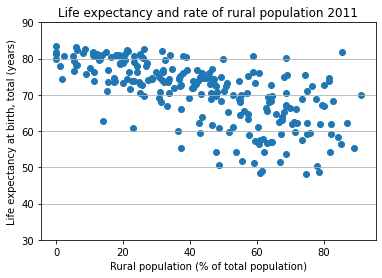

In [34]:
# And finally I can set up a scatter-plot of the observations
fig, axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('Life expectancy and rate of rural population 2011',fontsize=12)
axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)

X = RuralLife['ValueRural']
Y = RuralLife['ValueLife']
plt.ylim(30,90)

axis.scatter(X, Y)
plt.show()


The scatterplot as expected shows a negative correlation, where the countries with higher rates of rural populace tends to have lower life expectancy at birth. 

### Jeg kunne gjort dette uten å merge datasettene ser jeg, men det var litt sent

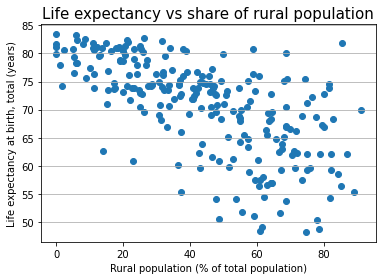

In [36]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Life expectancy vs share of rural population',fontsize=15)
axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage2['IndicatorName'].iloc[0],fontsize=10)

X2011 = Rural2011filterd['Value']
Y2011 = Life2011filterd['Value']

# Adjusting Y-axis
# plt.ylim(50,100)

# Adjusting x-axis
# plt.xlim(10,60)

axis.scatter(X2011, Y2011)
plt.show()